## Caselet - Demand forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# set the number format from scientific format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [72]:
def readCsv(param_path):
    df = pd.read_csv(param_path)
    print(f"Shape: {df.shape}")
    return df

def prepareTSPlot(param_df, styleId, date_start, date_end):
    chart_df = param_df[(param_df['STYLE'] == styleId) & 
                         (param_df['DATE'].between(date_start, date_end))]

    chart_df = chart_df.set_index('DATE')

    print(f"Shape: {chart_df.shape}")
    print(f"Date range: {chart_df.index.min()} to {chart_df.index.max()}")


    plt.figure(figsize=(16,4))
    plt.plot(chart_df['UNITS_SOLD'], label="Units sold", color="blue")
    plt.plot(chart_df['IsHoliday'], label="Holiday", color="green")
    plt.show()
    
def prepareTSPlot_v2(param_df, styleId, date_start, date_end):
    chart_df = param_df[(param_df['STYLE'] == styleId) & 
                         (param_df['DATE'].between(date_start, date_end))]

    chart_df = chart_df.set_index('DATE')

    print(f"Shape: {chart_df.shape}")
    print(f"Date range: {chart_df.index.min()} to {chart_df.index.max()}")
    
    fig, ax = plt.subplots(figsize=(16,4))
    ax2 = ax.twinx()
    ax.set_title('Units sold & Holidays over given range')
    ax.set_xlabel('Date range')
    ax.plot(chart_df['UNITS_SOLD'], label="Units sold", color='blue')
    ax2.plot(chart_df['IsHoliday'], label="Holiday", color='red')
    ax.legend(['Units sold'])
    ax2.legend(['Holiday'], loc='upper center')
    #ax.set_xticks(gdp['date'].dt.date)
    #ax.set_xticklabels(gdp['date'].dt.year, rotation=90)
    #ax.yaxis.grid(color='lightgray', linestyle='dashed')
    plt.tight_layout()
    plt.show()
    
    
def prepareTSPlot_v3(param_df, styleId, date_start, date_end):
    chart_df = param_df[(param_df.index >= date_start) & (param_df.index <= date_end)]

#     chart_df = chart_df.set_index('DATE')

    print(f"Shape: {chart_df.shape}")
    print(f"Date range: {chart_df.index.min()} to {chart_df.index.max()}")
    
    fig, ax = plt.subplots(figsize=(16,4))
    ax2 = ax.twinx()
    ax.set_title('Units sold & Holidays over given range')
    ax.set_xlabel('Date range')
    ax.plot(chart_df['UNITS_SOLD'], label="Units sold", color='blue')
    ax2.plot(chart_df['IsHoliday'], label="Holiday", color='red')
    ax.legend(['Units sold'])
    ax2.legend(['Holiday'], loc='upper center')
    #ax.set_xticks(gdp['date'].dt.date)
    #ax.set_xticklabels(gdp['date'].dt.year, rotation=90)
    #ax.yaxis.grid(color='lightgray', linestyle='dashed')
    plt.tight_layout()
    plt.show()

### Read the data files

#### 1. Styles data
This is the master meta data file

In [4]:
df_styles = readCsv("./Data/Styles.csv")
df_styles.head()

Shape: (165, 6)


,STYLE,DIVISION,SUBCATEGORY,GENDER,SUBSILLHOUTTE,DESCRIPTION
0,1237012,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Cheeky
1,1237013,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Thong
2,1238794,Apparel,Sideline,Mens,Shorts,XYZ_CoRoster Short
3,1240539,Accessories,Train,Unisex,Sackpacks,XYZ_CoOzsee Sackpack
4,1244464,Apparel,Golf,Boys,Short-Sleeve Polos,DFO B's Performance Polo


#### 2. Holidays data
Downloaded data for holidays in USA for relevant years as per existing data

In [5]:
df_holidays = readCsv("./Data/Holidays.csv")
df_holidays['IsHoliday'] = 1
df_holidays.head()

Shape: (40, 3)


,Day,Holiday Name,ConvertedDate,IsHoliday
0,Thursday,New Year's Day,1/1/2015,1
1,Monday,Martin Luther King Jr. Day,1/19/2015,1
2,Monday,President's Day,2/16/2015,1
3,Monday,Memorial Day,5/25/2015,1
4,Friday,Independence Day (in lieu),7/3/2015,1


In [6]:
# converting the date field to datetime dtype
df_holidays['ConvertedDate'] = df_holidays['ConvertedDate'].astype('datetime64[ns]')
df_holidays.dtypes

Day                      object
Holiday Name             object
ConvertedDate    datetime64[ns]
IsHoliday                 int64
dtype: object

In [7]:
df_holidays.head()

,Day,Holiday Name,ConvertedDate,IsHoliday
0,Thursday,New Year's Day,2015-01-01,1
1,Monday,Martin Luther King Jr. Day,2015-01-19,1
2,Monday,President's Day,2015-02-16,1
3,Monday,Memorial Day,2015-05-25,1
4,Friday,Independence Day (in lieu),2015-07-03,1


#### 3. Transactions data
The main daily transactions data at each Style - Article level

In [8]:
df_txn = readCsv("./Data/Transaction_data.csv")
df_txn.head()

Shape: (20984535, 8)


,CURRENT_TICKET_PRICE,ACTUAL_SALES_AMOUNT,STD_COST,UNITS_SOLD,CHANNEL,DATE,ARTICLE,STYLE
0,12.000,6.000,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012
1,12.000,4.800,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012
2,12.000,3.000,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012
3,12.000,3.000,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012
4,12.000,3.000,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012


In [9]:
df_txn['DATE'] = df_txn['DATE'].astype('datetime64[ns]')

# Lets also check the date range of our data
date_min = df_txn['DATE'].min()
date_max = df_txn['DATE'].max()
print(date_min)
print(date_max)

2015-01-01 00:00:00
2018-10-18 00:00:00


Checking the unique count of Style values in both of our data sets (Styles & Transactions), since we would be joining the data based on this common key

In [10]:
df_txn['STYLE'].unique().size

150

In [11]:
df_styles['STYLE'].unique().size

150

Since we were expecting only unique entry for Style id in our meta dataset, it seems like we do have some duplicate records there which would trouble us while merging. Checking the duplicate Style ids next

In [12]:
count_df = df_styles['STYLE'].value_counts().rename_axis('STYLE').reset_index(name='Counts')
count_df.head()

,STYLE,Counts
0,1257929,2
1,1254307,2
2,1260915,2
3,1260916,2
4,1262495,2


As we saw we do have 4 style ids with duplicate occurence, lets join this result with our main meta df and see more details on these style ids just to be sure they are indeed duplicates before we decide to drop these rows

In [13]:
df_styles = pd.merge(left=df_styles, right=count_df, left_on='STYLE', right_on='STYLE')

In [14]:
df_styles[df_styles['Counts'] == 2]

,STYLE,DIVISION,SUBCATEGORY,GENDER,SUBSILLHOUTTE,DESCRIPTION,Counts
5,1244595,Apparel,Train,Mens,Short-Sleeve Graph,DFO M's Velocity Tee,2
6,1244595,Apparel,Train,Mens,Short-Sleeve Graphic,DFO M's Velocity Tee,2
7,1245355,Apparel,Train,Boys,Short-Sleeve Graph,DFO B Training Big Logo Tee,2
8,1245355,Apparel,Train,Boys,Short-Sleeve Graphic,DFO B Training Big Logo Tee,2
9,1245359,Apparel,Train,Girls,Short-Sleeve Graph,DFO G Training Big Logo Tee,2
10,1245359,Apparel,Train,Girls,Short-Sleeve Graphic,DFO G Training Big Logo Tee,2
12,1249005,Apparel,Train,Boys,Long-Sleeve Graphi,DFO B's Big Logo LS T,2
13,1249005,Apparel,Train,Boys,Long-Sleeve Graphics,DFO B's Big Logo LS T,2
23,1254307,Apparel,Train,Mens,Short-Sleeve Graph,DFO M Triblend Athletics SSC,2
24,1254307,Apparel,Train,Mens,Short-Sleeve Graphic,DFO M Triblend Athletics SSC,2


From the above view, the only difference we have between the duplicate style-id rows is for subsillhoutte column (former row's content seems to be trimmed). Thus, we would be dropping the first row(s) where style-id count is = 2 

In [15]:
df_styles.drop(df_styles[df_styles['STYLE'].diff(-1) == 0].index, inplace=True)
print(df_styles.shape)
df_styles.head()

(150, 7)


,STYLE,DIVISION,SUBCATEGORY,GENDER,SUBSILLHOUTTE,DESCRIPTION,Counts
0,1237012,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Cheeky,1
1,1237013,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Thong,1
2,1238794,Apparel,Sideline,Mens,Shorts,XYZ_CoRoster Short,1
3,1240539,Accessories,Train,Unisex,Sackpacks,XYZ_CoOzsee Sackpack,1
4,1244464,Apparel,Golf,Boys,Short-Sleeve Polos,DFO B's Performance Polo,1


Now we have all uniques in our styles meta df. We can proceed to data merging 

In [16]:
merged_df = pd.merge(left=df_txn, right=df_styles, how='inner', left_on='STYLE', right_on='STYLE')
print(merged_df.shape)
merged_df.head()

(20984535, 14)


,CURRENT_TICKET_PRICE,ACTUAL_SALES_AMOUNT,STD_COST,UNITS_SOLD,CHANNEL,DATE,ARTICLE,STYLE,DIVISION,SUBCATEGORY,GENDER,SUBSILLHOUTTE,DESCRIPTION,Counts
0,12.000,6.000,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Cheeky,1
1,12.000,4.800,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Cheeky,1
2,12.000,3.000,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Cheeky,1
3,12.000,3.000,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Cheeky,1
4,12.000,3.000,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Cheeky,1


In [17]:
#merged_df['DATE'] = merged_df['DATE'].astype('datetime64[ns]')
merged_df.describe()

,CURRENT_TICKET_PRICE,ACTUAL_SALES_AMOUNT,STD_COST,UNITS_SOLD,STYLE,Counts
count,20956068.000,20984535.000,20984492.000,20355283.000,20984535.000,20984535.000
mean,27.749,5011.291,6.960,1.000,1272784.403,1.071
std,13.173,70483.922,3.157,0.000,17655.532,0.257
min,0.000,0.010,0.000,1.000,1237012.000,1.000
25%,19.990,11.990,4.940,1.000,1257677.000,1.000
50%,24.990,15.000,6.110,1.000,1272862.000,1.000
75%,27.990,21.990,7.920,1.000,1291314.000,1.000
max,449.990,999999.000,20.820,1.000,1323931.000,2.000


In [18]:
merged_df.dtypes

CURRENT_TICKET_PRICE           float64
ACTUAL_SALES_AMOUNT            float64
STD_COST                       float64
UNITS_SOLD                     float64
CHANNEL                         object
DATE                    datetime64[ns]
ARTICLE                         object
STYLE                            int64
DIVISION                        object
SUBCATEGORY                     object
GENDER                          object
SUBSILLHOUTTE                   object
DESCRIPTION                     object
Counts                           int64
dtype: object

Now lets also merge our holidays data to this set

In [19]:
# final_df = pd.merge(left=merged_df, right=df_holidays[['ConvertedDate','IsHoliday']], how='left', left_on='DATE', right_on='ConvertedDate')
# print(final_df.shape)
# final_df.head()

(20984535, 16)


,CURRENT_TICKET_PRICE,ACTUAL_SALES_AMOUNT,STD_COST,UNITS_SOLD,CHANNEL,DATE,ARTICLE,STYLE,DIVISION,SUBCATEGORY,GENDER,SUBSILLHOUTTE,DESCRIPTION,Counts,ConvertedDate,IsHoliday
0,12.000,6.000,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Cheeky,1,NaT,NaN
1,12.000,4.800,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Cheeky,1,NaT,NaN
2,12.000,3.000,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Cheeky,1,NaT,NaN
3,12.000,3.000,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Cheeky,1,NaT,NaN
4,12.000,3.000,1.920,1.000,Factory House,2017-07-01,1237012-001001,1237012,Apparel,Lifestyle,Womens,Underwear Bottoms,XYZ_CoPure Stretch Cheeky,1,NaT,NaN


### Null value check/handling

In [19]:
merged_df.isna().sum()

CURRENT_TICKET_PRICE     28467
ACTUAL_SALES_AMOUNT          0
STD_COST                    43
UNITS_SOLD              629252
CHANNEL                      0
DATE                         0
ARTICLE                      0
STYLE                        0
DIVISION                     0
SUBCATEGORY                  0
GENDER                       0
SUBSILLHOUTTE                0
DESCRIPTION                  0
Counts                       0
dtype: int64

In [21]:
## filling all holiday flags to 0 which are not marked holidays
# final_df['IsHoliday'].fillna(0, inplace=True)

In [20]:
## Fill nas in CURRENT_TICKET_PRICE from actual sales amount
merged_df.CURRENT_TICKET_PRICE = np.where(merged_df.CURRENT_TICKET_PRICE.isna(), 
                                         merged_df.ACTUAL_SALES_AMOUNT, 
                                         merged_df.CURRENT_TICKET_PRICE)

In [22]:
## Fill nas in UNITS_SOLD - since we checked above its std-dev is 0, all values are simply 1
merged_df.UNITS_SOLD.fillna(value=merged_df.UNITS_SOLD.mean(), inplace=True)

In [23]:
merged_df['STD_COST_DIFF'] = merged_df['CURRENT_TICKET_PRICE'] - merged_df['STD_COST']
merged_df['STD_COST_DIFF'].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count   20984492.000
mean          27.548
std         2601.263
min           -8.310
25%           14.270
50%           18.500
75%           21.930
90%           38.530
95%           41.670
99%           54.200
max       999997.170
Name: STD_COST_DIFF, dtype: float64

In [24]:
## Fill nas in STD_COST as the 75th quantile difference from Current ticket price
merged_df.STD_COST = np.where(merged_df.STD_COST.isna(), 
                                         merged_df.CURRENT_TICKET_PRICE - merged_df['STD_COST_DIFF'].quantile(0.75), 
                                         merged_df.STD_COST)

In [25]:
merged_df.isna().sum()

CURRENT_TICKET_PRICE     0
ACTUAL_SALES_AMOUNT      0
STD_COST                 0
UNITS_SOLD               0
CHANNEL                  0
DATE                     0
ARTICLE                  0
STYLE                    0
DIVISION                 0
SUBCATEGORY              0
GENDER                   0
SUBSILLHOUTTE            0
DESCRIPTION              0
Counts                   0
STD_COST_DIFF           43
dtype: int64

#### Dropping irrelevant columns & reindexing their positions for easier flow

In [26]:
merged_df.columns

Index(['CURRENT_TICKET_PRICE', 'ACTUAL_SALES_AMOUNT', 'STD_COST', 'UNITS_SOLD',
       'CHANNEL', 'DATE', 'ARTICLE', 'STYLE', 'DIVISION', 'SUBCATEGORY',
       'GENDER', 'SUBSILLHOUTTE', 'DESCRIPTION', 'Counts', 'STD_COST_DIFF'],
      dtype='object')

In [28]:
analysis_df = merged_df[['DATE', 'STYLE',
       'CURRENT_TICKET_PRICE', 'ACTUAL_SALES_AMOUNT', 'STD_COST','UNITS_SOLD']]
print(analysis_df.columns)
analysis_df.head(50)

Index(['DATE', 'STYLE', 'CURRENT_TICKET_PRICE', 'ACTUAL_SALES_AMOUNT',
       'STD_COST', 'UNITS_SOLD'],
      dtype='object')


,DATE,STYLE,CURRENT_TICKET_PRICE,ACTUAL_SALES_AMOUNT,STD_COST,UNITS_SOLD
0,2017-07-01,1237012,12.000,6.000,1.920,1.000
1,2017-07-01,1237012,12.000,4.800,1.920,1.000
2,2017-07-01,1237012,12.000,3.000,1.920,1.000
3,2017-07-01,1237012,12.000,3.000,1.920,1.000
4,2017-07-01,1237012,12.000,3.000,1.920,1.000
5,2017-07-01,1237012,12.000,6.000,1.920,1.000
6,2017-07-01,1237012,12.000,6.000,1.920,1.000
7,2017-07-01,1237012,12.000,6.000,1.920,1.000
8,2017-07-01,1237012,12.000,6.000,1.920,1.000
9,2017-07-01,1237012,12.000,6.000,1.920,1.000


In [29]:
# cols_order = ['DATE', 'IsHoliday','STYLE', 'ARTICLE', 'GENDER', 'DIVISION', 'SUBCATEGORY',
#     'SUBSILLHOUTTE','CHANNEL', 'DESCRIPTION',
#     'CURRENT_TICKET_PRICE', 'ACTUAL_SALES_AMOUNT', 'STD_COST', 'UNITS_SOLD']

# final_df = final_df.reindex(columns=cols_order)
# print(final_df.shape)
# final_df.head(50)

In [29]:
analysis_df.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,STYLE,CURRENT_TICKET_PRICE,ACTUAL_SALES_AMOUNT,STD_COST,UNITS_SOLD
count,20984535.000,20984535.000,20984535.000,20984535.000,20984535.000
mean,1272784.403,34.508,5011.291,6.960,1.000
std,17655.532,2601.274,70483.922,3.157,0.000
min,1237012.000,0.000,0.010,-1.960,1.000
25%,1257677.000,19.990,11.990,4.940,1.000
50%,1272862.000,24.990,15.000,6.110,1.000
75%,1291314.000,27.990,21.990,7.920,1.000
90%,1293935.000,49.990,34.650,12.770,1.000
95%,1293959.000,54.990,38.990,13.960,1.000
99%,1293960.000,69.990,54.990,15.880,1.000


### Outlier testing/handling

As we can see from our table above, we do have outliers for all 3 columns (Ticket price, Sales price & STD_COST). We would be flattening the data beyond 99 percentile to 99th percentile value for these vars

In [30]:
CTP_Threshold = analysis_df.CURRENT_TICKET_PRICE.quantile(0.99)
ASA_Threshold = analysis_df.ACTUAL_SALES_AMOUNT.quantile(0.99)
SC_Threshold = analysis_df.STD_COST.quantile(0.99)

analysis_df.CURRENT_TICKET_PRICE = np.where(analysis_df.CURRENT_TICKET_PRICE > CTP_Threshold, 
                                         CTP_Threshold, 
                                         analysis_df.CURRENT_TICKET_PRICE)
analysis_df.ACTUAL_SALES_AMOUNT = np.where(analysis_df.ACTUAL_SALES_AMOUNT > ASA_Threshold, 
                                         ASA_Threshold, 
                                         analysis_df.ACTUAL_SALES_AMOUNT)
analysis_df.STD_COST = np.where(analysis_df.STD_COST > SC_Threshold, 
                                         SC_Threshold, 
                                         analysis_df.STD_COST)

# also, update STD_COST when its < 0 to current ticket price
analysis_df.STD_COST = np.where(analysis_df.STD_COST < 0, 
                                         analysis_df.CURRENT_TICKET_PRICE, 
                                         analysis_df.STD_COST)

## validate
analysis_df.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,STYLE,CURRENT_TICKET_PRICE,ACTUAL_SALES_AMOUNT,STD_COST,UNITS_SOLD
count,20984535.000,20984535.000,20984535.000,20984535.000,20984535.000
mean,1272784.403,27.742,18.423,6.958,1.000
std,17655.532,13.177,9.966,3.150,0.000
min,1237012.000,0.000,0.010,0.000,1.000
25%,1257677.000,19.990,11.990,4.940,1.000
50%,1272862.000,24.990,15.000,6.110,1.000
75%,1291314.000,27.990,21.990,7.920,1.000
90%,1293935.000,49.990,34.650,12.770,1.000
95%,1293959.000,54.990,38.990,13.960,1.000
99%,1293960.000,69.990,54.990,15.880,1.000


In [32]:
print(analysis_df.shape)
analysis_df.dtypes

(20984535, 6)


DATE                    datetime64[ns]
STYLE                            int64
CURRENT_TICKET_PRICE           float64
ACTUAL_SALES_AMOUNT            float64
STD_COST                       float64
UNITS_SOLD                     float64
dtype: object

### Aggregation & Data prep

Since we have multiple transaction records for a single styleId on same date, we would be grouping these to a daily level instead

In [34]:
#'DATE':'min', 
#'STYLE': 'min',
#'IsHoliday': 'max'
analysis_df_grouped_d = analysis_df.groupby(by=['DATE','STYLE']).agg({'ACTUAL_SALES_AMOUNT': 'sum',
                                                                     'CURRENT_TICKET_PRICE': 'sum',
                                                                     'STD_COST': 'sum',
                                                                     'UNITS_SOLD': 'sum'}).reset_index()
print(analysis_df_grouped_d.shape)
analysis_df_grouped_d.sample(n=5)

(96902, 6)


,DATE,STYLE,ACTUAL_SALES_AMOUNT,CURRENT_TICKET_PRICE,STD_COST,UNITS_SOLD
67876,2017-09-26,1281188,8.980,14.970,6.480,1.000
77814,2018-01-29,1252568,13.970,19.970,7.610,1.000
39338,2016-09-18,1282034,3474.560,3578.210,1256.580,179.000
41185,2016-10-16,1265720,1061.860,1061.860,351.360,52.000
29481,2016-05-11,1274443,19.990,19.990,4.440,1.000


In [89]:
# analysis_df_grouped_d['Year'] = analysis_df_grouped_d['DATE'].dt.year
# analysis_df_grouped_d['Week'] = analysis_df_grouped_d['DATE'].dt.week
# analysis_df_grouped_d['Weekday'] = analysis_df_grouped_d['DATE'].dt.dayofweek
# analysis_df_grouped_d['IsWeekend'] = np.where((analysis_df_grouped_d['Weekday'] == 5) | 
#                                               (analysis_df_grouped_d['Weekday'] == 6),
#                                              1,0)
# analysis_df_grouped_d.sort_values('STYLE').head(10)

,DATE,STYLE,ACTUAL_SALES_AMOUNT,CURRENT_TICKET_PRICE,STD_COST,UNITS_SOLD,IsHoliday,Week,Weekday,Year,IsWeekend
0,2015-01-01,1237012,3217.890,3681.510,669.350,334.000,1.000,1,3,2015,0
15958,2015-11-14,1237012,8391.450,9787.680,2304.130,1160.000,0.000,46,5,2015,1
84268,2018-04-23,1237012,262.780,547.970,88.770,46.000,0.000,17,0,2018,0
16033,2015-11-15,1237012,5381.880,6039.900,1296.560,660.000,0.000,46,6,2015,1
84191,2018-04-22,1237012,560.800,1177.880,192.780,100.000,0.000,16,6,2018,1
16106,2015-11-16,1237012,1892.490,2240.680,391.850,203.000,0.000,47,0,2015,0
84109,2018-04-21,1237012,598.280,1243.790,205.770,107.000,0.000,16,5,2018,1
84036,2018-04-20,1237012,267.950,571.970,92.580,48.000,0.000,16,4,2018,0
84341,2018-04-24,1237012,151.780,295.970,48.000,25.000,0.000,17,1,2018,0
16173,2015-11-17,1237012,1879.080,2375.230,429.600,221.000,0.000,47,1,2015,0


### EDA

#### Actual sales amount for any styleid over a given 1 year period

In [37]:
analysis_df_grouped_d.DATE.max() - analysis_df_grouped_d.DATE.min()

Timedelta('1386 days 00:00:00')

Checking the number of transaction day rows we have for each styleId

In [35]:
analysis_df_grouped_d['STYLE'].value_counts()

1237012    1387
1252132    1387
1237013    1385
1257845    1383
1244464    1376
           ... 
1271185     100
1323931      95
1252085      44
1249108      10
1281184       1
Name: STYLE, Length: 150, dtype: int64

In [56]:
li_styles = list(df_styles.STYLE.unique())
li_style_dfs = []
dict_style_index = {}
for indx, styleId in enumerate(li_styles):
    dict_style_index[indx] = styleId
    
    cur_df = analysis_df_grouped_d[analysis_df_grouped_d.STYLE == styleId]
    if cur_df.DATE.min() > date_min:
        #print(f'appending: {date_min}')
        cur_df = cur_df.append({'DATE': date_min}, ignore_index=True)

    if cur_df.DATE.max() < date_max:
        #print(f'appending: {date_max}')
        cur_df = cur_df.append({'DATE': date_max}, ignore_index=True)
        
    cur_df = cur_df.set_index('DATE').asfreq(freq='D')    
    cur_df['IsWeekend'] = np.where(cur_df.index.dayofweek > 4,1,0)
    
    cur_df = cur_df.reset_index().merge(df_holidays[['ConvertedDate','IsHoliday']], 
                      how='left', left_on='DATE', right_on='ConvertedDate').set_index('DATE')
    
    cur_df['STYLE'].fillna(styleId, inplace=True)
    cur_df.fillna(0, inplace=True)
    
    cur_df.drop(['ConvertedDate'], axis=1, inplace=True)
    
    print(f"{styleId}: {cur_df.shape}")
    li_style_dfs.append(cur_df)

1237012: (1387, 7)
1237013: (1387, 7)
1238794: (1387, 7)
1240539: (1387, 7)
1244464: (1387, 7)
1244595: (1387, 7)
1245355: (1387, 7)
1245359: (1387, 7)
1248179: (1387, 7)
1249005: (1387, 7)
1249108: (1387, 7)
1249757: (1387, 7)
1250189: (1387, 7)
1251484: (1387, 7)
1252085: (1387, 7)
1252132: (1387, 7)
1252510: (1387, 7)
1252568: (1387, 7)
1253960: (1387, 7)
1254307: (1387, 7)
1254313: (1387, 7)
1254317: (1387, 7)
1254460: (1387, 7)
1254462: (1387, 7)
1254465: (1387, 7)
1254469: (1387, 7)
1254478: (1387, 7)
1254530: (1387, 7)
1254531: (1387, 7)
1255839: (1387, 7)
1256304: (1387, 7)
1256305: (1387, 7)
1256349: (1387, 7)
1256353: (1387, 7)
1256697: (1387, 7)
1257468: (1387, 7)
1257469: (1387, 7)
1257666: (1387, 7)
1257667: (1387, 7)
1257677: (1387, 7)
1257845: (1387, 7)
1257929: (1387, 7)
1259695: (1387, 7)
1259964: (1387, 7)
1260509: (1387, 7)
1260562: (1387, 7)
1260884: (1387, 7)
1260886: (1387, 7)
1260915: (1387, 7)
1260916: (1387, 7)
1260962: (1387, 7)
1261593: (1387, 7)
1261595: (13

In [57]:
test_df = li_style_dfs[0]
test_df.head()

,STYLE,ACTUAL_SALES_AMOUNT,CURRENT_TICKET_PRICE,STD_COST,UNITS_SOLD,IsWeekend,IsHoliday
DATE,,,,,,,
2015-01-01,1237012,3217.890,3681.510,669.350,334.000,0,1.000
2015-01-02,1237012,4452.480,5253.240,930.740,468.000,0,0.000
2015-01-03,1237012,4300.460,4983.510,883.190,443.000,1,0.000
2015-01-04,1237012,2490.630,2941.540,547.550,272.000,1,0.000
2015-01-05,1237012,1462.150,1619.370,279.610,142.000,0,0.000


In [71]:
test_df[(test_df.index >= chart_date_start) & (test_df.index <= chart_date_end)].shape

(365, 7)

Shape: (365, 7)
Date range: 2015-01-01 00:00:00 to 2015-12-31 00:00:00


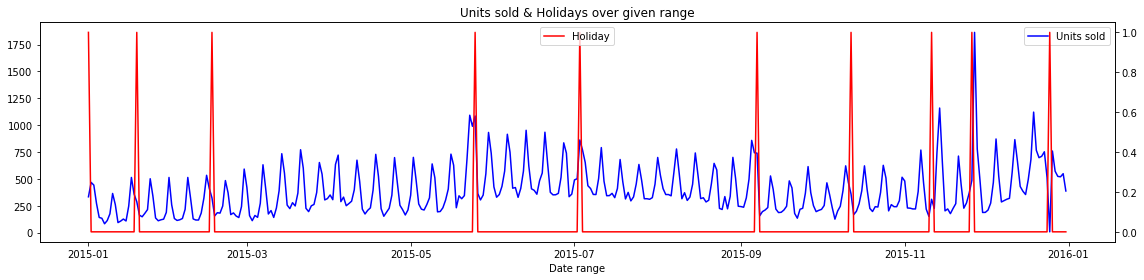

In [73]:
chart_styleId = 1237012

chart_date_start = "2015-01-01"
chart_date_end = "2015-12-31"

prepareTSPlot_v3(test_df, chart_styleId, chart_date_start, chart_date_end)

Shape: (366, 10)
Date range: 2016-01-01 00:00:00 to 2016-12-31 00:00:00


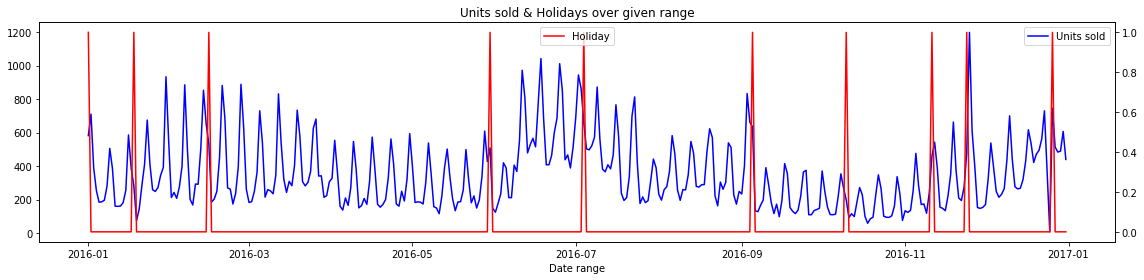

In [95]:
chart_date_start = "2016-01-01"
chart_date_end = "2016-12-31"

prepareTSPlot_v2(analysis_df_grouped_d, chart_styleId, chart_date_start, chart_date_end)

In [69]:
chart_df[chart_df['IsHoliday'] == 1].head(10)

,STYLE,ACTUAL_SALES_AMOUNT,CURRENT_TICKET_PRICE,STD_COST,UNITS_SOLD,IsHoliday
DATE,,,,,,
2015-01-01,1237012,3217.890,3681.510,669.350,334.000,1.000
2015-01-19,1237012,2706.460,3177.930,583.360,288.000,1.000
2015-02-16,1237012,3109.870,3666.350,657.450,324.000,1.000
2015-05-25,1237012,8665.930,11008.890,2231.090,1086.000,1.000
2015-07-03,1237012,7465.630,9211.320,1742.010,863.000,1.000
2015-09-07,1237012,6485.700,7751.600,1477.710,740.000,1.000
2015-10-12,1237012,3092.730,3853.150,707.700,360.000,1.000
2015-11-11,1237012,2414.800,3139.100,615.180,311.000,1.000
2015-11-26,1237012,4545.250,5411.000,947.510,487.000,1.000


### Computed features

 - Discount: CURRENT_TICKET_PRICE - ACTUAL_SALES_AMOUNT
 - Profit: ACTUAL_SALES_AMOUNT - STD_COST

In [ ]:
final_df['Discount'] = final_df['CURRENT_TICKET_PRICE'] - final_df['ACTUAL_SALES_AMOUNT']
final_df['Profit'] = final_df['ACTUAL_SALES_AMOUNT'] - final_df['STD_COST']

In [ ]:
final_df.set_index('DATE', inplace=True)

In [ ]:
# plot
plt.figure(figsize=(15, 6), dpi=80)
x = final_df[final_df.index.year==2015].ACTUAL_SALES_AMOUNT
plt.plot(x, label='Sales')
plt.show()

In [ ]:
final_df.shape